In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date)


('2017-08-23',)


In [10]:
# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print (one_year_ago)

2016-08-23


<Figure size 1000x600 with 0 Axes>

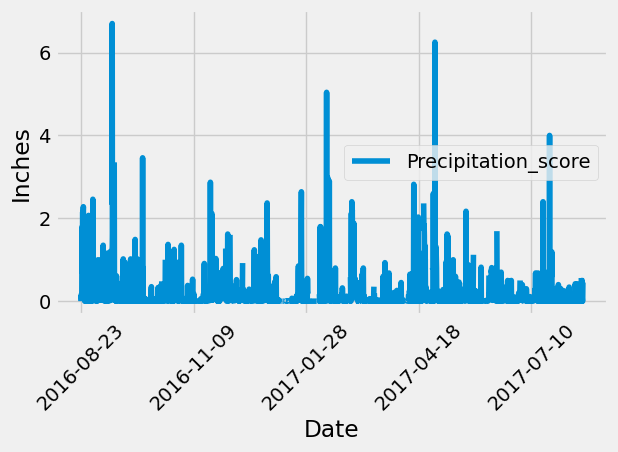

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()



# Perform a query to retrieve the data and precipitation scores
precipitation_score = session.query(Measurement.date, Measurement.prcp).\
                      filter(Measurement.date >= one_year_ago).\
                      order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_score_df = pd.DataFrame(precipitation_score, columns = ['Date', 'Precipitation_score'])

# Sort the dataframe by date
precipitation_score_df.sort_values (by = 'Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,6))
#plt.plot(precipitation_score_df['Date'],precipitation_score_df['Precipitation_score'],label='Precipitation')
precipitation_score_df.plot(x='Date',y='Precipitation_score')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = precipitation_score_df.describe()
print(summary_statistics)

       Precipitation_score
count          2021.000000
mean              0.177279
std               0.461190
min               0.000000
25%               0.000000
50%               0.020000
75%               0.130000
max               6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
total_station = session.query(func.count(Station.station)).all()
print(total_station)

[(9,)]


In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count = session.query(Measurement.station,func.count(Measurement.station)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()
print ("most active station:")
for station, count in station_count:
    print(f"[ {station}, {count}]") 

most active station:
[ USC00519281, 2772]
[ USC00519397, 2724]
[ USC00513117, 2709]
[ USC00519523, 2669]
[ USC00516128, 2612]
[ USC00514830, 2202]
[ USC00511918, 1979]
[ USC00517948, 1372]
[ USC00518838, 511]


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temperature = session.query(func.min(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
highest_temperature = session.query(func.max(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()             
average_temperature = session.query(func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print (f"[{lowest_temperature}, {highest_temperature}, {average_temperature}]")

[[(54.0,)], [(85.0,)], [(71.66378066378067,)]]


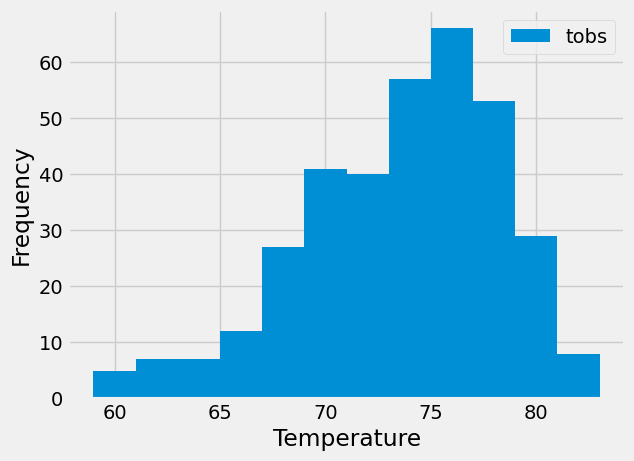

In [92]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temperature_obs_data = session.query (Measurement.tobs).\
                       filter(Measurement.station == 'USC00519281').\
                       filter(Measurement.date >= '2016-08-23').all()

#plt.hist(temperature_obs_data ['tobs'])
df = pd.DataFrame(temperature_obs_data, columns=["tobs"])
df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.show()


# Close Session

In [ ]:
# Close Session
session.close()